# ch03.02. 여러가지 확률 분포
---
* 날짜:
* 이름:

## 학습내용
    * 연속형 확률변수 -> 확률 밀도 함수 -> 연속형 확률 분포
      - 균등 분포
      - 정규 분포
      - 감마 분포
      - 베타 분포
      - 카이제곱 분포
    * 이산형 확률변수 -> 확률 질량 함수 -> 이산형 확률 분포
      - 베르누이 분포
      - 이항분포
      - 카테고리 확률 분포
      - 포아송 분포
      - 기하 분포
      - 음이항 분포
      - 초기하 분포


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from scipy.stats import *

## 연속형 확률 분포
---



### **| 정규분포**

\begin{align}
\mathcal{N}(x; \mu, \sigma^2) = \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\dfrac{(x-\mu)^2}{2\sigma^2}\right)
\end{align}

```
sp.stats.norm(mu, std)
```

In [ ]:
mu, std = 0, 1 #표준정규분포
norm = sp.stats.norm(mu, std) # 확률함수

* 확률 분포


In [ ]:
X = np.linspace(-5, 5, 10)
P_X = norm.pdf(X)   
print(P_X)

[1.48671951e-06 2.07440309e-04 8.42153448e-03 9.94771388e-02
 3.41892294e-01 3.41892294e-01 9.94771388e-02 8.42153448e-03
 2.07440309e-04 1.48671951e-06]


* 누적 확률 분포


In [ ]:
F_X = norm.cdf(X)
print(F_X)

[2.86651572e-07 5.03521029e-05 2.73660179e-03 4.77903523e-02
 2.89257361e-01 7.10742639e-01 9.52209648e-01 9.97263398e-01
 9.99949648e-01 9.99999713e-01]


* 표본 추출



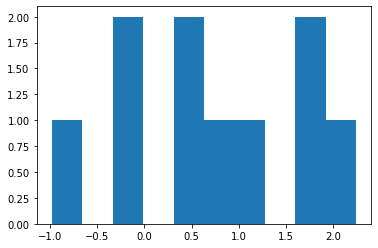

In [ ]:
rvs = norm.rvs(10, random_state=0)
_=plt.hist(rvs)

#### **예제 01. 파라미터 변경-평균**

* 표준편차 `1`, 평균이 각각 `0.5, 1, 2, 4`인 확률분포와 확률누적분포를 그리세요.

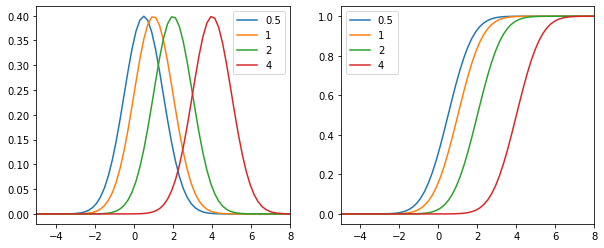

In [ ]:
mus = [0.5,1,2,4]
std = 1     
X = np.linspace(-10, 10, 100)

fig, axes = plt.subplots(1,2, figsize=(10,4))

for mu in mus:
  norm = sp.stats.norm(mu, std)
  P_X = norm.pdf(X) # 확률 밀도
  F_X = norm.cdf(X) #누적 확률
  axes[0].plot(X,P_X) #확률값 그래프
  axes[1].plot(X,F_X) #누적값 그래프
  axes[0].set_xlim(-5,8) #x범위 조절
  axes[1].set_xlim(-5,8) #x범위 조절
axes[0].legend(mus)
axes[1].legend(mus)

#### **예제 02. 파라미터 변경-표준편차**

* 평균 `0`, 표준편차가 각각 `0.5, 1, 2, 4`인 확률분포와 확률누적분포를 그리세요.

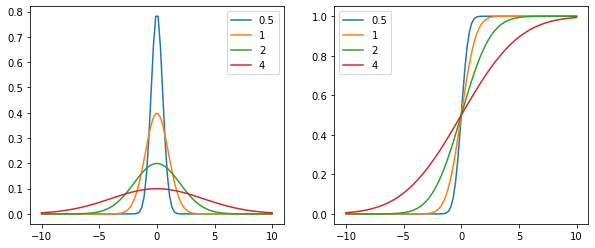

In [ ]:
mu = 0
stds = [0.5,1,2,4]

X = np.linspace(-10, 10, 100)

fig, axes = plt.subplots(1,2, figsize=(10,4))

for std in stds:
  norm = sp.stats.norm(mu, std)
  P_X = norm.pdf(X) # 확률 밀도
  F_X = norm.cdf(X) #누적 확률
  axes[0].plot(X,P_X) #확률값 그래프
  axes[1].plot(X,F_X) #누적값 그래프
axes[0].legend(stds)
axes[1].legend(stds)

#### **예제 03. 손의 길이**

성인 손의 길이의 평균은 15.2cm 이고 표준편차는 2.5cm를 따른다고 합니다. 1000명을 표본으로 뽑고 히스토 그램을 그리세요.

(array([ 19.,  46., 117., 214., 226., 225., 103.,  35.,  12.,   3.]),
 array([ 8.18763073,  9.75788746, 11.32814419, 12.89840091, 14.46865764,
        16.03891436, 17.60917109, 19.17942782, 20.74968454, 22.31994127,
        23.89019799]),
 <a list of 10 Patch objects>)

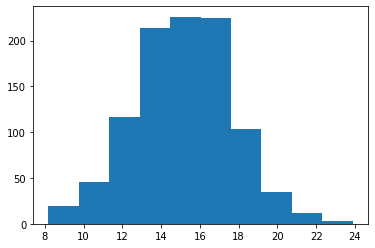

In [ ]:
mu = 15.2
std = 2.5
norm = sp.stats.norm(mu, std)
rvs=norm.rvs(1000)
plt.hist(rvs)

### **| 카이제곱 분포** 

\begin{align}
\chi^2(x; \nu) = \frac{x^{(\nu/2-1)} e^{-x/2}}{2^{\nu/2} \Gamma\left(\frac{\nu}{2}\right)}
\end{align}

```
sp.stats.chi2(df=df)
```

In [ ]:
df = 1
chi2 = sp.stats.chi2(df)

* 확률 분포


In [ ]:
X = np.linspace(0, 10, 100)
chi2.pdf(X)

array([0.        , 0.02400882, 0.04565272, 0.06510643, 0.08253317,
       0.09808543, 0.11190556, 0.12412647, 0.13487215, 0.14425828,
       0.1523927 , 0.15937595, 0.16530169, 0.17025714, 0.1743235 ,
       0.17757634, 0.18008592, 0.18191757, 0.18313196, 0.18378547,
       0.1839304 , 0.18361525, 0.18288499, 0.18178128, 0.18034267,
       0.17860483, 0.17660072, 0.17436079, 0.17191312, 0.16928362,
       0.16649612, 0.16357258, 0.16053315, 0.15739634, 0.15417911,
       0.150897  , 0.14756419, 0.14419365, 0.14079718, 0.1373855 ,
       0.13396835, 0.13055455, 0.12715206, 0.12376803, 0.12040891,
       0.11708046, 0.11378779, 0.11053546, 0.10732748, 0.10416738,
       0.10105821, 0.09800262, 0.09500288, 0.09206091, 0.08917828,
       0.08635628, 0.08359595, 0.08089804, 0.0782631 , 0.07569148,
       0.07318333, 0.07073864, 0.06835724, 0.06603882, 0.06378296,
       0.06158911, 0.05945666, 0.05738485, 0.05537291, 0.05341995,
       0.05152504, 0.0496872 , 0.04790542, 0.04617862, 0.04450

* 누적 확률 분포


In [ ]:
chi2.cdf(X)

array([0.        , 0.00123324, 0.00477065, 0.01038228, 0.01785523,
       0.02699255, 0.03761216, 0.0495459 , 0.06263855, 0.07674703,
       0.0917395 , 0.10749468, 0.12390106, 0.1408563 , 0.15826652,
       0.17604578, 0.1941155 , 0.21240395, 0.23084575, 0.24938143,
       0.26795701, 0.2865236 , 0.30503703, 0.32345749, 0.34174924,
       0.35988028, 0.37782207, 0.39554926, 0.41303948, 0.43027306,
       0.44723287, 0.46390406, 0.48027394, 0.49633173, 0.51206847,
       0.52747684, 0.542551  , 0.55728652, 0.57168016, 0.58572988,
       0.59943463, 0.61279431, 0.62580967, 0.63848221, 0.65081415,
       0.66280828, 0.67446797, 0.68579707, 0.69679986, 0.707481  ,
       0.71784549, 0.72789861, 0.73764588, 0.74709305, 0.75624604,
       0.76511091, 0.77369383, 0.78200108, 0.79003899, 0.79781394,
       0.80533234, 0.81260059, 0.8196251 , 0.82641225, 0.83296838,
       0.83929979, 0.8454127 , 0.85131327, 0.85700761, 0.86250171,
       0.86780147, 0.87291273, 0.87784118, 0.88259244, 0.88717

* 표본 추출


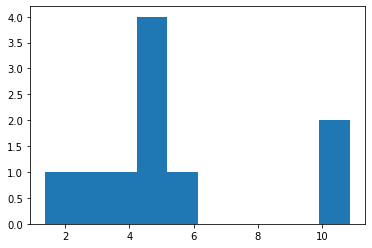

In [ ]:
rvs = chi2.rvs(10, random_state=0)
_=plt.hist(rvs)

#### **예제 01. 파라미터 변경-자유도**

* 자유도(df) 값이 각각 `1,2,3,4`인 카이제곱분포와 누적 확률 분포를 그리세요.

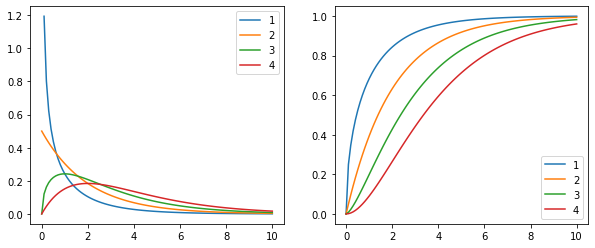

In [ ]:
dfs = [1,2,3,4]

X = np.linspace(0, 10, 100)

fig, axes = plt.subplots(1,2, figsize=(10,4))

for df in dfs:
  chi2 = sp.stats.chi2(df)
  P_X = chi2.pdf(X)
  F_X = chi2.cdf(X)
  axes[0].plot(X,P_X) 
  axes[1].plot(X,F_X) 
axes[0].legend(dfs)
axes[1].legend(dfs)

### **| 감마분포**

\begin{align}
\text{Gam}(x;a,b) = \frac{1}{\Gamma(a)} b^a x^{a-1}e^{-bx}
\end{align}

```
sp.stats.gamma(a=a, b=1)
```

In [ ]:
a=1
gamma = sp.stats.gamma(a)

* 확률 분포

In [ ]:
X = np.linspace(0, 10, 100)
gamma.pdf(X)

array([1.00000000e+00, 9.03923902e-01, 8.17078421e-01, 7.38576715e-01,
       6.67617146e-01, 6.03475096e-01, 5.45495564e-01, 4.93086479e-01,
       4.45712654e-01, 4.02890322e-01, 3.64182192e-01, 3.29192988e-01,
       2.97565410e-01, 2.68976487e-01, 2.43134276e-01, 2.19774883e-01,
       1.98659770e-01, 1.79573314e-01, 1.62320611e-01, 1.46725480e-01,
       1.32628669e-01, 1.19886224e-01, 1.08368023e-01, 9.79564464e-02,
       8.85451733e-02, 8.00380986e-02, 7.23483504e-02, 6.53974032e-02,
       5.91142759e-02, 5.34348070e-02, 4.83009992e-02, 4.36604277e-02,
       3.94657042e-02, 3.56739933e-02, 3.22465753e-02, 2.91484502e-02,
       2.63479808e-02, 2.38165696e-02, 2.15283666e-02, 1.94600051e-02,
       1.75903638e-02, 1.59003503e-02, 1.43727066e-02, 1.29918331e-02,
       1.17436285e-02, 1.06153465e-02, 9.59546540e-03, 8.67357053e-03,
       7.84024772e-03, 7.08698731e-03, 6.40609723e-03, 5.79062440e-03,
       5.23428381e-03, 4.73139424e-03, 4.27682035e-03, 3.86592014e-03,
      

* 누적 확률 분포


In [ ]:
gamma.cdf(X)

array([0.        , 0.0960761 , 0.18292158, 0.26142329, 0.33238285,
       0.3965249 , 0.45450444, 0.50691352, 0.55428735, 0.59710968,
       0.63581781, 0.67080701, 0.70243459, 0.73102351, 0.75686572,
       0.78022512, 0.80134023, 0.82042669, 0.83767939, 0.85327452,
       0.86737133, 0.88011378, 0.89163198, 0.90204355, 0.91145483,
       0.9199619 , 0.92765165, 0.9346026 , 0.94088572, 0.94656519,
       0.951699  , 0.95633957, 0.9605343 , 0.96432601, 0.96775342,
       0.97085155, 0.97365202, 0.97618343, 0.97847163, 0.98053999,
       0.98240964, 0.98409965, 0.98562729, 0.98700817, 0.98825637,
       0.98938465, 0.99040453, 0.99132643, 0.99215975, 0.99291301,
       0.9935939 , 0.99420938, 0.99476572, 0.99526861, 0.99572318,
       0.99613408, 0.9965055 , 0.99684124, 0.99714472, 0.99741905,
       0.99766701, 0.99789116, 0.99809377, 0.99827691, 0.99844246,
       0.9985921 , 0.99872737, 0.99884964, 0.99896016, 0.99906006,
       0.99915037, 0.999232  , 0.99930578, 0.99937248, 0.99943

* 표본 추출

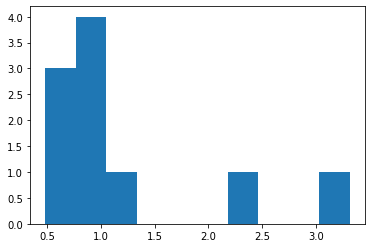

In [ ]:
rvs = gamma.rvs(10, random_state=0)
_=plt.hist(rvs)

#### **예제 01. 파라미터 변경-a**

* a 값이 각각 `1,2,4,8`인 감마 분포와 누적 확률 분포를 그리세요.

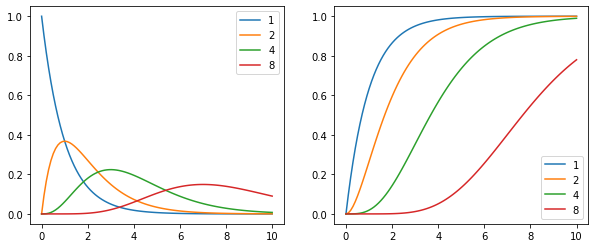

In [ ]:
A = [1,2,4,8]

X = np.linspace(0, 10, 100)

fig, axes = plt.subplots(1,2, figsize=(10,4))

for a in A:
  gamma = sp.stats.gamma(a)
  P_X = gamma.pdf(X)
  F_X = gamma.cdf(X)
  axes[0].plot(X,P_X) 
  axes[1].plot(X,F_X) 
axes[0].legend(A)
axes[1].legend(A)

### **| 균등분포**



```
sp.stats.uniform
```

In [ ]:
a = 1
uniform = sp.stats.uniform(a)

* 확률 분포

In [ ]:
X = np.linspace(0, 10, 100)
uniform.pdf(X)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

* 누적 확률 분포


In [ ]:
uniform.cdf(X)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01010101, 0.11111111, 0.21212121, 0.31313131, 0.41414141,
       0.51515152, 0.61616162, 0.71717172, 0.81818182, 0.91919192,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

* 표본 추출

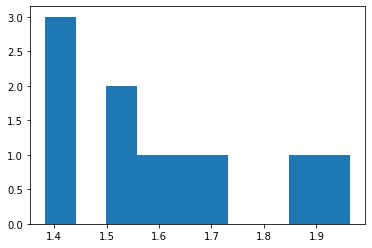

In [ ]:
rvs = uniform.rvs(10, random_state=0)
_=plt.hist(rvs)

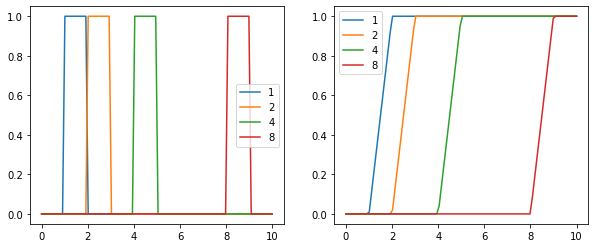

In [ ]:
A = [1,2,4,8]

X = np.linspace(0, 10, 100)

fig, axes = plt.subplots(1,2, figsize=(10,4))

for a in A:
  uniform = sp.stats.uniform(a)
  P_X = uniform.pdf(X)
  F_X = uniform.cdf(X)
  axes[0].plot(X,P_X) 
  axes[1].plot(X,F_X) 
axes[0].legend(A)
axes[1].legend(A)

### **| 베타분포**


```
sp.stats.beta(a, b)
```

In [ ]:
a = 1
b = 10
beta = sp.stats.beta(a, b)

* 확률 분포

In [ ]:
X = np.linspace(0, 10, 100)
beta.pdf(X)

array([1.00000000e+01, 3.83524673e+00, 1.31197956e+00, 3.88083399e-01,
       9.48312234e-02, 1.78257565e-02, 2.28488692e-03, 1.58805387e-04,
       3.53236569e-06, 4.24097618e-09, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

* 누적 확률 분포


In [ ]:
beta.cdf(X)

array([0.        , 0.65521519, 0.89530668, 0.97295176, 0.99434844,
       0.99911772, 0.99990999, 0.99999535, 0.99999993, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

* 표본 추출

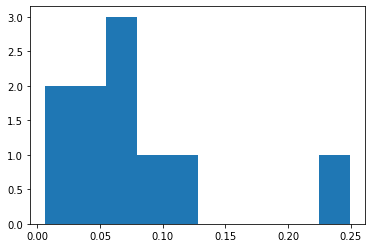

In [ ]:
rvs = beta.rvs(10, random_state=0)
_=plt.hist(rvs)

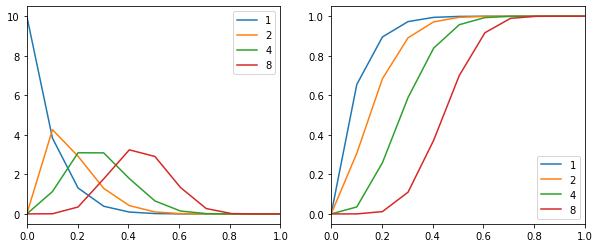

In [ ]:
A = [1,2,4,8]

X = np.linspace(0, 10, 100)

fig, axes = plt.subplots(1,2, figsize=(10,4))

for a in A:
  beta = sp.stats.beta(a, b)
  P_X = beta.pdf(X)
  F_X = beta.cdf(X)
  axes[0].plot(X,P_X) 
  axes[1].plot(X,F_X) 
  axes[0].set_xlim(0, 1) 
  axes[1].set_xlim(0, 1) 
axes[0].legend(A)
axes[1].legend(A)

## 이산형 확률 분포
---

### |  **베르누이 분포**

\begin{split}
\begin{align}
\text{Bern}(x;\mu) = 
\begin{cases} 
\mu   & \text{if }x=1, \\
1-\mu & \text{if }x=0
\end{cases}
\end{align}
\end{split}

* 기본사용

```
mu = 0.5
rv = sp.stats.bernoulli(mu)
```

In [6]:
mu = 0.5 #동전 던지기
bernoulli = sp.stats.bernoulli(mu)

* 확률 분포


In [14]:

bernoulli.pmf([0, 1, 2, 3, 4, 0.6])
#베르누이 함수는 0과 1일때만 확률 값을 낸다

array([0.5, 0.5, 0. , 0. , 0. , 0. ])

* 누적 확률 분포


In [11]:
bernoulli.cdf([0, 1])

array([0.5, 1. ])

* 표본 추출

In [12]:
bernoulli.rvs(20)    #항상 반반으로 나오진 않는다.

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1])

#### **예제 01. 동전 던지기**

동전을 던져서 앞면이 나온 확률



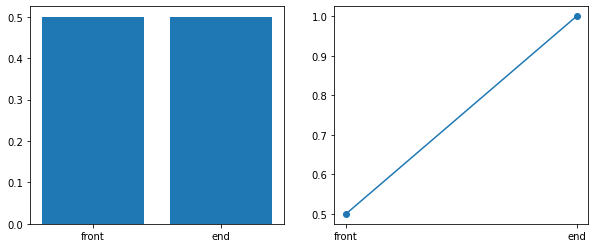

In [138]:
mu= 0.5
bernoulli = sp.stats.bernoulli(mu)
x = [0,1]

fig, axes = plt.subplots(1,2, figsize=(10,4))
axes[0].bar(['front', 'end'], bernoulli.pmf(x))
axes[1].plot(['front', 'end'], bernoulli.cdf(x), marker='o')
plt.show()

#### **예제 02. 주사위 굴리기**

주사위 던져서 6이 나온 확률


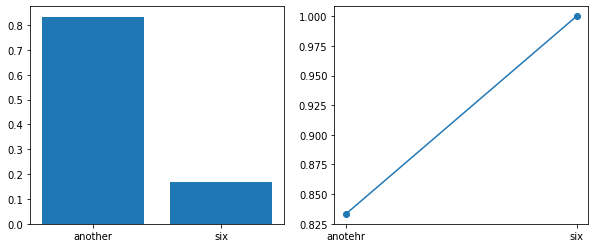

In [139]:
#확률 분포 그리고 누적확률 분포 그리기
mu = 1/6
x = [0,1]
bernoulli = sp.stats.bernoulli(mu)

fig, axes = plt.subplots(1,2, figsize=(10,4))
axes[0].bar(['another', 'six'], bernoulli.pmf(x))
axes[1].plot(['anotehr', 'six'], bernoulli.cdf(x), marker='o')
plt.show()

#### **예제 03. 같은 생일**

두 사람의 생일 월(月)이 같을 확률


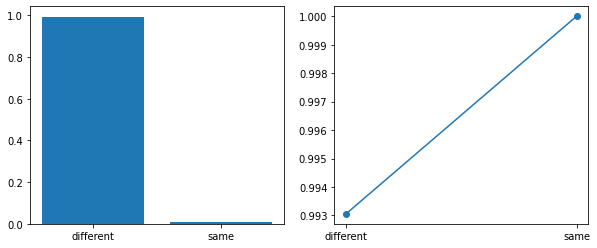

In [135]:
mu= 1/144
bernoulli = sp.stats.bernoulli(mu)
x = [0,1]

fig, axes = plt.subplots(1,2, figsize=(10,4))
axes[0].bar(['different','same'], bernoulli.pmf(x))
axes[1].plot(['different','same'], bernoulli.cdf(x), marker='o')

#### **예제 04. 주머니 공**
주머니에 5개의 공이 들어있고 3개는 빨강, 2개는 하양이다. 공 2개를 뽑았을 때 색깔이 모두 다를 확률은?

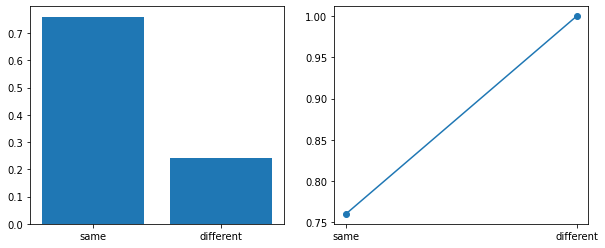

In [134]:
mu= 3/5 * 2/5
bernoulli = sp.stats.bernoulli(mu)
x = [0,1]

fig, axes = plt.subplots(1,2, figsize=(10,4))
axes[0].bar(['same','different'], bernoulli.pmf(x))
axes[1].plot(['same','different'], bernoulli.cdf(x), marker='o')
plt.show()

### |  **이항분포**

\begin{align}
\text{Bin}(x;N,\mu) = \binom N x \; \mu^x(1-\mu)^{N-x}
\end{align}


```
sp.stats.binom(N, mu)
```

In [ ]:
#베르누이 시행을 N번한거
#동전 던지기를 10번시행, 앞면이 나올 확률
N = 10
mu = .5
binom = sp.stats.binom(N, mu)

* 확률 분포


In [31]:
binom.pmf(np.arange(11))  #1~11 번 가운데 가장 높은 확률은 6번 7번이다.

array([0.00097656, 0.00976563, 0.04394531, 0.1171875 , 0.20507813,
       0.24609375, 0.20507813, 0.1171875 , 0.04394531, 0.00976563,
       0.00097656])

* 누적 확률  분포

In [32]:
binom.cdf(np.arange(11))

array([9.76562500e-04, 1.07421875e-02, 5.46875000e-02, 1.71875000e-01,
       3.76953125e-01, 6.23046875e-01, 8.28125000e-01, 9.45312500e-01,
       9.89257812e-01, 9.99023438e-01, 1.00000000e+00])

* 확률 변수 표본 추출


In [33]:
binom.rvs(100)

array([8, 5, 7, 5, 2, 6, 4, 6, 5, 5, 3, 6, 4, 4, 1, 6, 5, 6, 1, 0, 7, 2,
       5, 5, 3, 6, 6, 5, 5, 7, 3, 5, 4, 8, 6, 8, 5, 8, 4, 7, 6, 3, 5, 4,
       5, 2, 4, 5, 3, 4, 5, 4, 5, 3, 6, 4, 4, 4, 6, 5, 4, 4, 5, 7, 4, 6,
       4, 5, 5, 5, 5, 4, 3, 5, 3, 5, 5, 6, 4, 3, 3, 2, 5, 3, 6, 6, 4, 4,
       5, 5, 4, 4, 2, 9, 4, 8, 5, 4, 5, 6])

#### **예제 01. 동전 던지기**

* 동전을 1번 던졌을 때 앞면이 나온 횟수의 확률분포



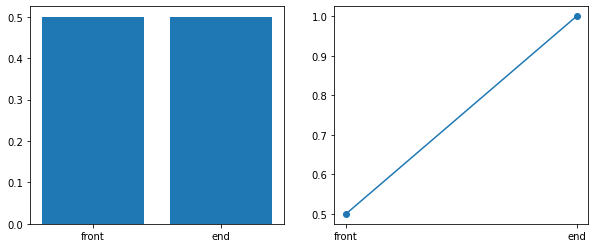

In [133]:
N=1
mu =.5
x = [0,1]
binom = sp.stats.binom(N,mu)

fig, axes = plt.subplots(1,2, figsize=(10,4))
axes[0].bar(['front','end'], binom.pmf(x))
axes[1].plot(['front','end'], binom.cdf(x), marker='o')
plt.show()

* 동전을 10번 던졌을 때 앞면이 나온 횟수의 확률분포


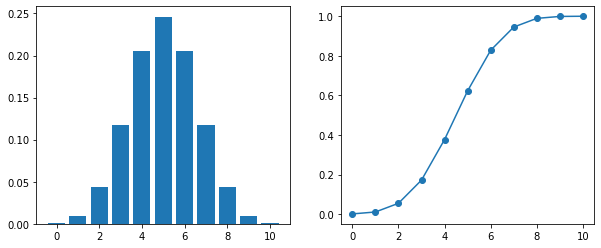

In [132]:
N=10
mu =.5
x = np.arange(11)
binom = sp.stats.binom(N,mu)

fig, axes = plt.subplots(1,2, figsize=(10,4))
axes[0].bar(x, binom.pmf(x))
axes[1].plot(x, binom.cdf(x), marker='o')
plt.show()

#### **예제 02. 주사위 굴리기**

* 주사위를 1번 던져서 짝수가 나온 횟수의 분포

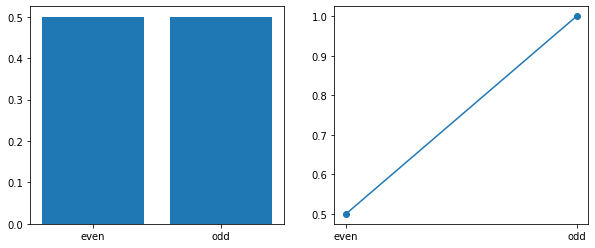

In [131]:
N=1
mu =3/6
x = [0,1]
binom = sp.stats.binom(N,mu)

fig, axes = plt.subplots(1,2, figsize=(10,4))
axes[0].bar(['even','odd'], binom.pmf(x))
axes[1].plot(['even','odd'], binom.cdf(x), marker='o')
plt.show()

* 주사위를 6번 던져서 짝수가 나온 횟수의 분포

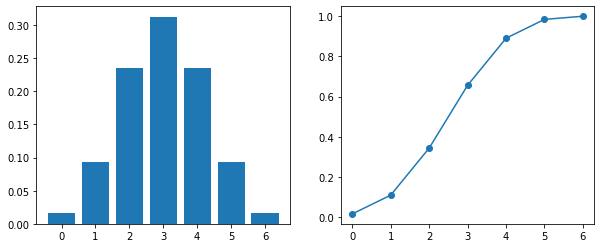

In [130]:
N=6
mu =3/6
x = np.arange(7)
binom = sp.stats.binom(N,mu)

fig, axes = plt.subplots(1,2, figsize=(10,4))
axes[0].bar(x, binom.pmf(x))
axes[1].plot(x, binom.cdf(x), marker='o')
plt.show()

* 주사위를 20번 던져서 짝수가 나온 횟수의 분포

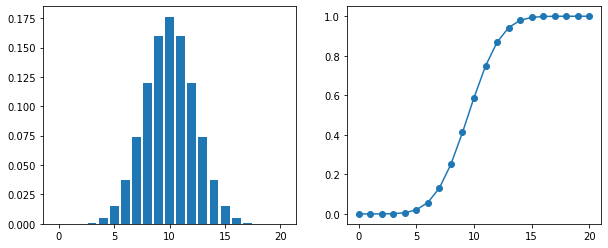

In [129]:
N=20
mu =3/6
x = np.arange(21)
binom = sp.stats.binom(N,mu)

fig, axes = plt.subplots(1,2, figsize=(10,4))
axes[0].bar(x, binom.pmf(x))
axes[1].plot(x, binom.cdf(x), marker='o')
plt.show()

* 주사위를 1번 던져서 6이 나온 횟수의 분포

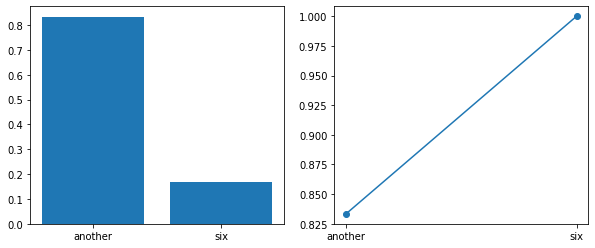

In [128]:
N=1
mu =1/6
x = [0,1]
binom = sp.stats.binom(N,mu)

fig, axes = plt.subplots(1,2, figsize=(10,4))
axes[0].bar(['another','six'], binom.pmf(x))
axes[1].plot(['another','six'], binom.cdf(x), marker='o')
plt.show()

* 주사위를 6번 던져서 6이 나온 횟수의 분포

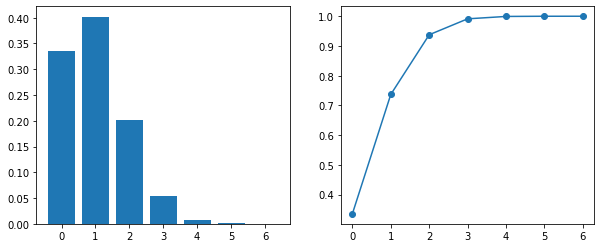

In [127]:
N=6
mu =1/6
x = np.arange(7)
binom = sp.stats.binom(N,mu)

fig, axes = plt.subplots(1,2, figsize=(10,4))
axes[0].bar(x, binom.pmf(x))
axes[1].plot(x, binom.cdf(x), marker='o')
plt.show()

* 주사위를 20번 던져서 6이 나온 횟수의 분포

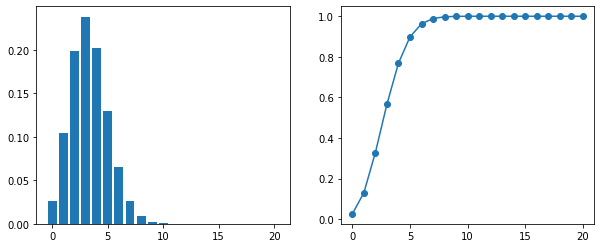

In [126]:
N=20
mu =1/6
x = np.arange(21)
binom = sp.stats.binom(N,mu)

fig, axes = plt.subplots(1,2, figsize=(10,4))
axes[0].bar(x, binom.pmf(x))
axes[1].plot(x, binom.cdf(x), marker='o')
plt.show()

### **| 카테고리 확률분포**

\begin{split} 
\begin{align}
\text{Cat}(x;\mu) = 
\begin{cases}
\mu_1 & \text{if } x = (1, 0, 0, \cdots, 0) \\
\mu_2 & \text{if } x = (0, 1, 0, \cdots, 0) \\
\mu_3 & \text{if } x = (0, 0, 1, \cdots, 0) \\
\vdots & \vdots \\
\mu_K & \text{if } x = (0, 0, 0, \cdots, 1) \\
\end{cases}
\end{align}
\end{split}


```
sp.stats.multinomial(1, mu)
```

In [34]:
#원핫인코딩: 1하나 나머지다 0  각클래스를 벡터로 표현
#sp.stats.multinomial(N, mu)
#N : N번 시행 ->1로 고정
#mus : 클래스(카테고리)별 확률, 벡터(리스트, 어레이)
N = 1
mus = [1/3, 1/3, 1/3]
multinomial = sp.stats.multinomial(N, mus)

* 확률 분포


In [37]:
# 베르누이 시행 xs = [0,1], p(xs) = [0.6, 0.4]  x값이 0일때 확률은 0.6 
# 카테고리 시행 x값이 A일때, B일때, C일때 원핫인코딩으로 표현
x = [[1,0,0], [0,1,0], [0,0,1]]
multinomial.pmf(x)

#카테고리는 숫자의 개념이 아니라서 누적확률은 구할 수 없다.

array([0.33333333, 0.33333333, 0.33333333])

* 표본 추출


In [41]:
multinomial.rvs(10)

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0]])

#### **예제 01.공정하지 않은 주사위**

* 주사위의 짝수 면이 나올 확률이 홀수 면이 나올 확률의 2배일 때 확률분포를 그래세요.

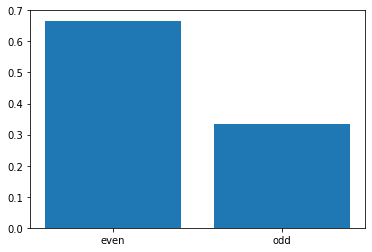

In [148]:
N = 1
mus = [2/3, 1/3]
multinomial = sp.stats.multinomial(N, mus)
x = np.eye(2)

plt.bar(['even','odd'], multinomial.pmf(x))
plt.show()

#### **예제 02. 주머니 공**

주머니 안에 빨간색 5개, 노란색, 3개 초록색 2개 공이 들어 있을 때 공 한개를 뽑을 때 나오는 색깔의 확률 분포를 그리세요.

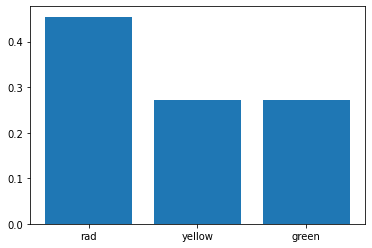

In [147]:
N = 1
mus = [5/11, 3/11, 2/11]
multinomial = sp.stats.multinomial(N, mus)
x = np.eye(3)

plt.bar(['rad','yellow','green'], multinomial.pmf(x))
plt.show()

#### **예제 03. 선호 자리**

교실에 5개의 자리가 있고 학생이 x번째 자리에 앉을 확률이 $f(X=x)=\frac{1}{2^{(x+1)}}$ 로 주어졌습니다. 확률 분포를 그리세요.

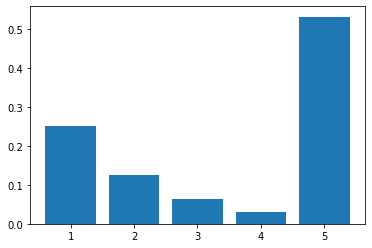

In [156]:
N = 1
mus = list(map(lambda x: 1/2**(x+1), [1,2,3,4,5]))
multinomial = sp.stats.multinomial(N, mus)
x = np.eye(5)
plt.bar([1,2,3,4,5], multinomial.pmf(x))
plt.show()